# Data overview and sampling

In [ ]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('data/vehicles.csv')

# Get a sample of 10%
sample = df.sample(frac=0.30)

## Keep relevant column; replace Na with 'missing'

In [ ]:
relevant_cols = ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 
                 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color']
sample = sample[relevant_cols]
# df = df[relevant_cols]

# Drop rows with missing data in relevant columns
sample.dropna(subset=['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 
                    'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color'], 
            inplace=True)


# sample = sample.fillna('missing')
# df = df.fillna('missing')

## Write to file

In [ ]:
# Write the resulting dataframe to a new CSV file

sample.to_csv('data/30p_sample_vehicles.csv', index=False)
# df.to_csv('relcols_full_vehicles.csv', index=False)

# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/30p_sample_vehicles.csv')
# df = pd.read_csv('relcols_full_vehicles.csv')

## Observing outliers

29315    1111111111
23192     135008900
20538      17000000
19858       2000000
29745       1111111
5645         195000
27564        155000
7970         150000
16653        140000
12187        140000
Name: price, dtype: int64


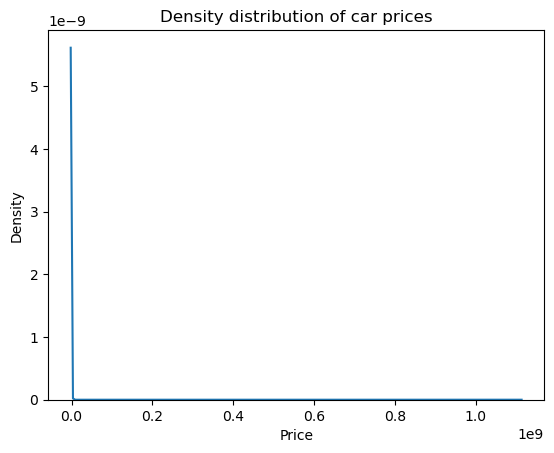

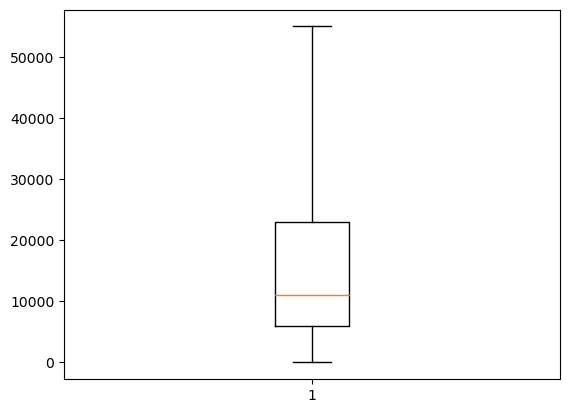

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price

# Observe top prices
top_prices = df['price'].sort_values(ascending=False).head(10)
print(top_prices)

# Create a density plot
sns.kdeplot(df['price'])
plt.title('Density distribution of car prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Create a box plot with modified whiskers
plt.boxplot(df['price'], whis=[0, 99], showfliers=False)
plt.show()


<Axes: xlabel='year', ylabel='Density'>

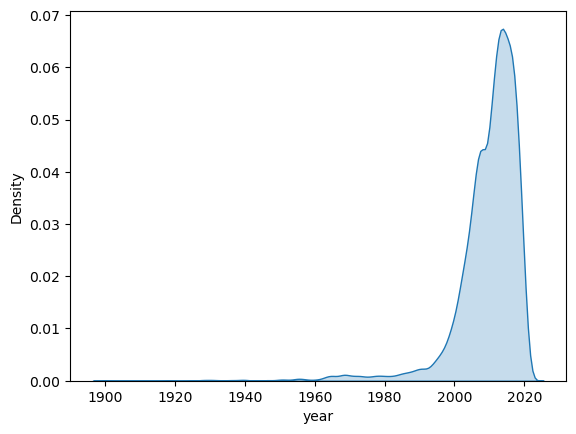

In [3]:
# Year
df['year'].dtype
df['year'] = pd.to_numeric(df['year'], errors='coerce')
sns.kdeplot(df['year'], fill=True)

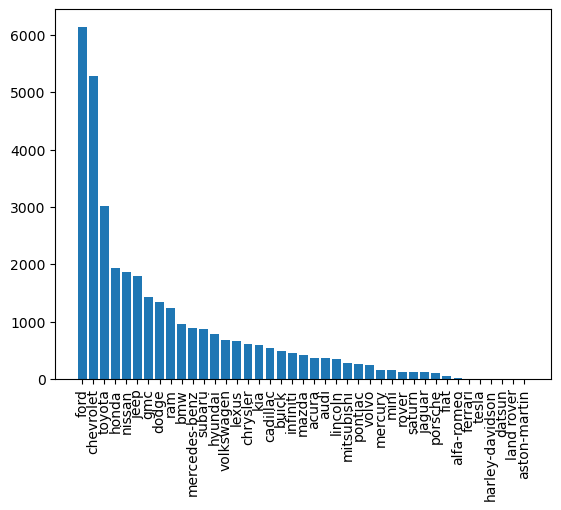

In [4]:
# Manufacturer
counts = df['manufacturer'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.show()

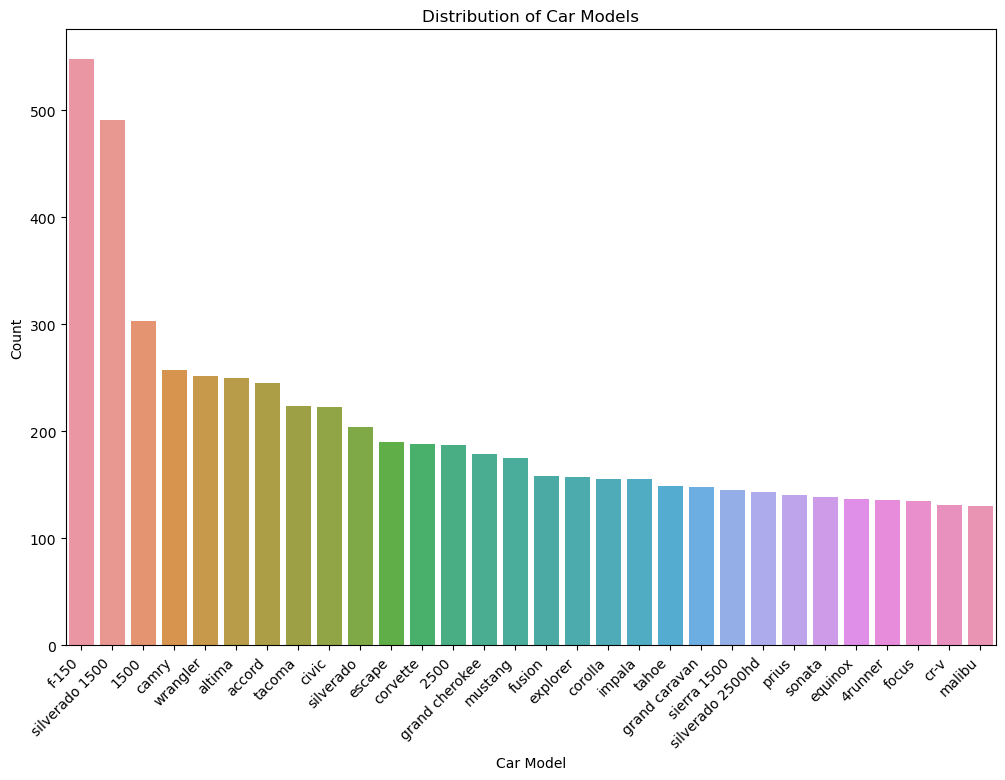

In [5]:
# Model
plt.figure(figsize=(12,8))
sns.countplot(x='model', data=df, order=df['model'].value_counts().iloc[:30].index)
plt.title('Distribution of Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='condition', ylabel='count'>

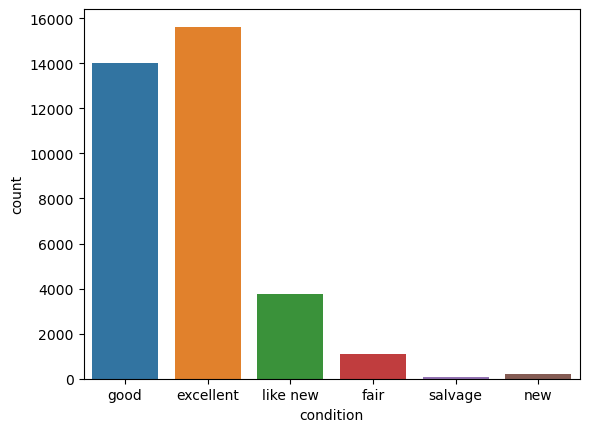

In [6]:
# Condition
sns.countplot(x='condition', data=df)

<Axes: xlabel='cylinders', ylabel='count'>

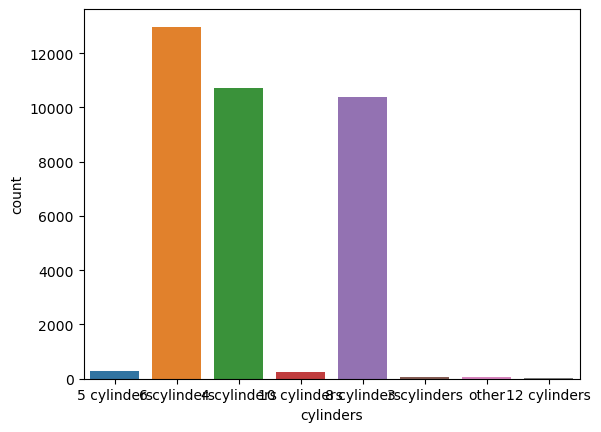

In [7]:
# Cylinders
sns.countplot(x='cylinders', data=df)

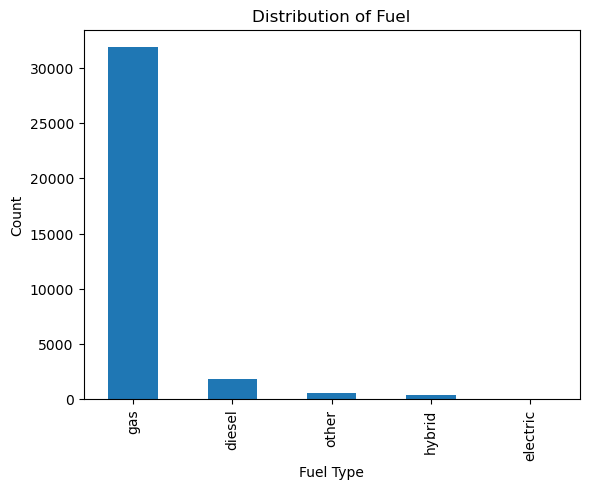

In [8]:
# Fuel
df['fuel'].value_counts().plot(kind='bar')
plt.title('Distribution of Fuel')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


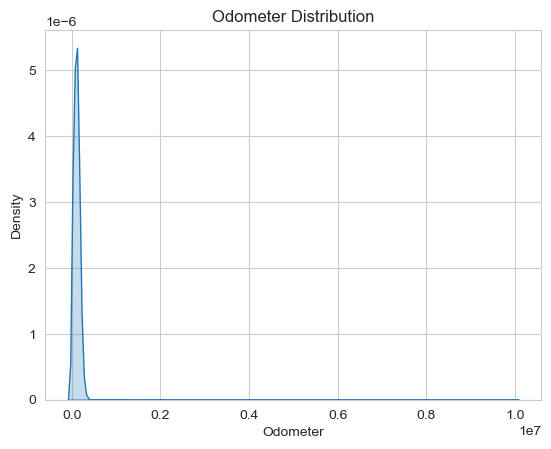

In [9]:
# Odometer
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
sns.set_style('whitegrid')
sns.kdeplot(df[df['odometer'].notnull()]['odometer'], fill=True)
plt.title('Odometer Distribution')
plt.xlabel('Odometer')
plt.ylabel('Density')
plt.show()

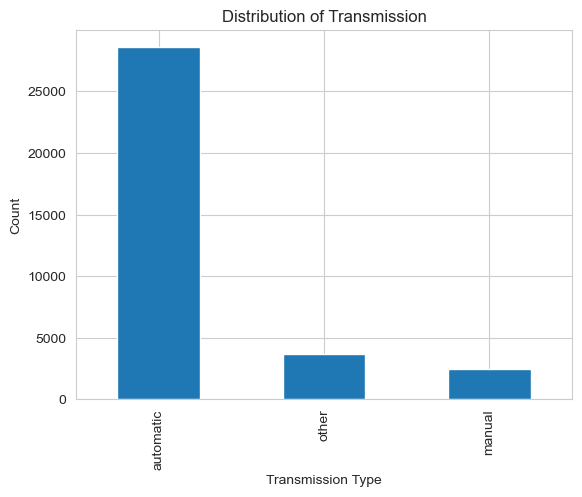

In [10]:
# Transmission
df['transmission'].value_counts().plot(kind='bar')
plt.title('Distribution of Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

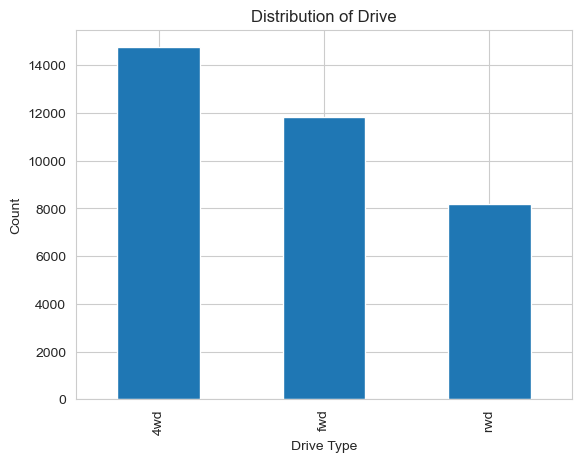

In [11]:
# Drive
df['drive'].value_counts().plot(kind='bar')
plt.title('Distribution of Drive')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()

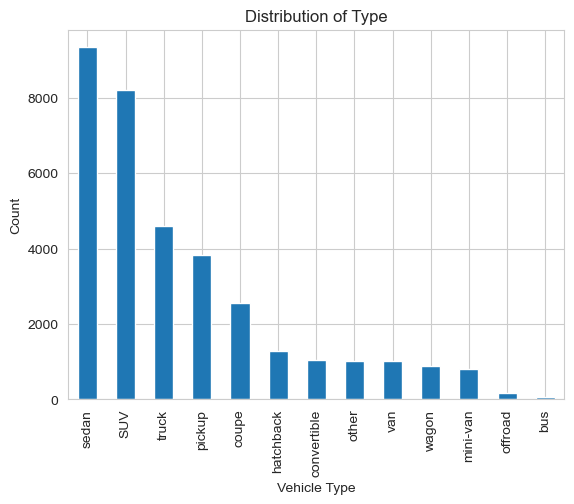

In [12]:
# Type
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

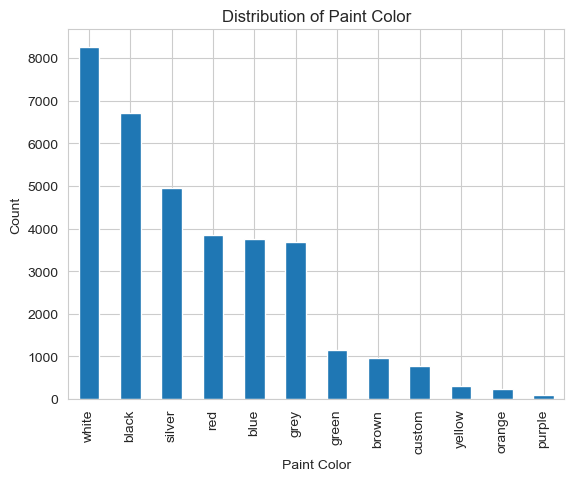

In [13]:
# Paint Color
df['paint_color'].value_counts().plot(kind='bar')
plt.title('Distribution of Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.show()

# Data Cleaning

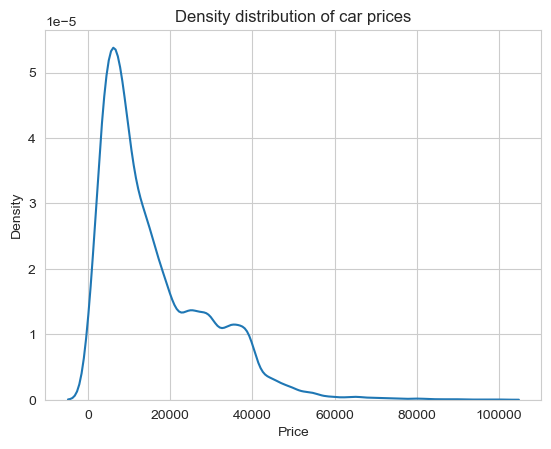

In [14]:
# Removing price outliers and zero values
# Confirmed is better

# # calculate the 99th percentile value of 'price' column
# price_99percentile = df['price'].quantile(0.99)

# filter high values
df = df[df['price'] <= 100000]

# filter low values
df = df[df['price'] > 0]

# Create a density plot
sns.kdeplot(df['price'])
plt.title('Density distribution of car prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='year', ylabel='Density'>

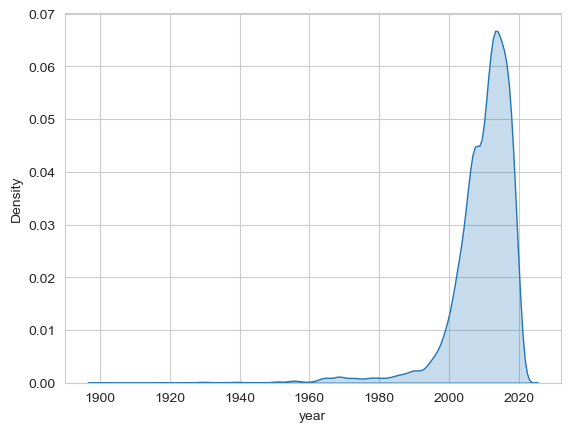

In [15]:
# Year
# Confirmed is not better to drop. Made results worse

# # Find the 1st percentile value of year
# year_1st_percentile = df['year'].quantile(0.01)

# # Drop Bottom
# df = df[df['year'] > 1950]


sns.kdeplot(df['year'], fill=True)

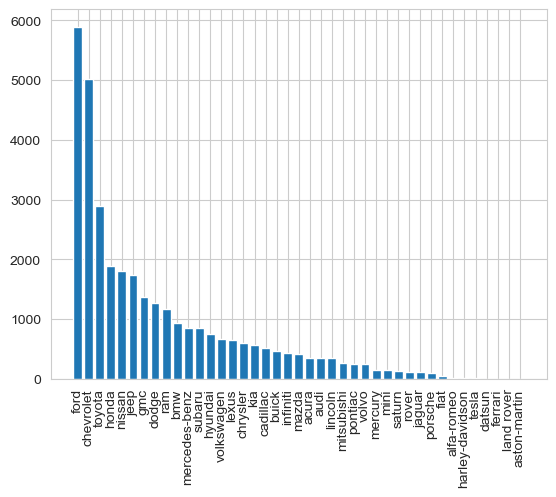

In [16]:
# Remove manufacturers with count below 500?
# df = df.groupby('manufacturer').filter(lambda x: len(x) >= 500)

counts = df['manufacturer'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.show()

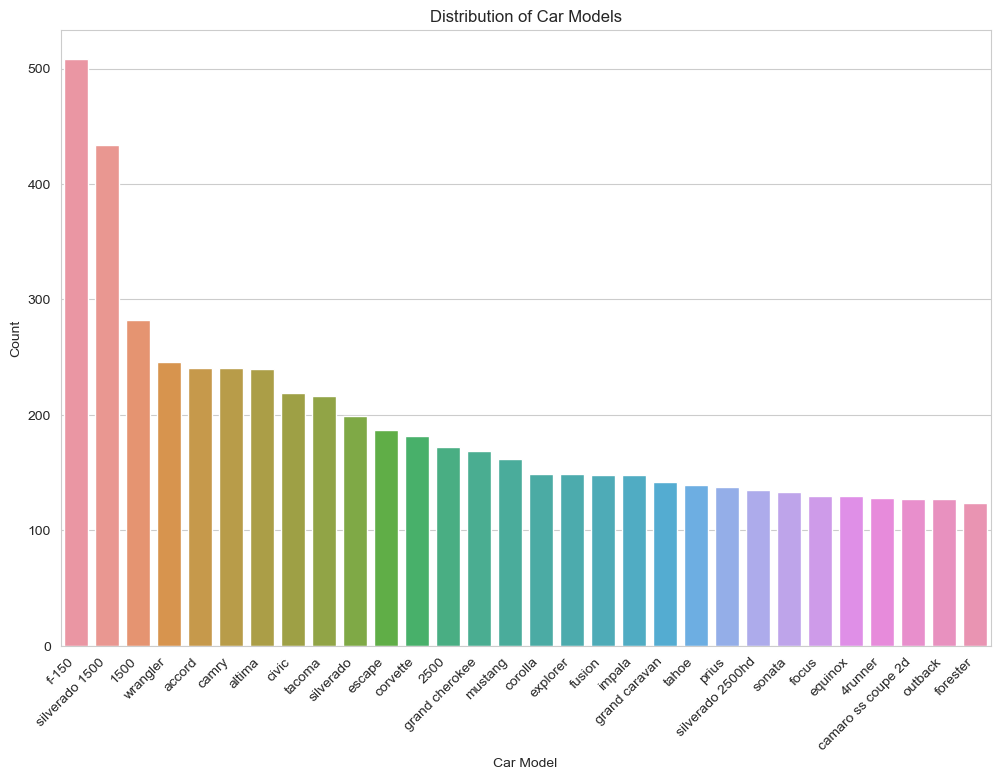

In [17]:
# Model
plt.figure(figsize=(12,8))
sns.countplot(x='model', data=df, order=df['model'].value_counts().iloc[:30].index)
plt.title('Distribution of Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='condition', ylabel='count'>

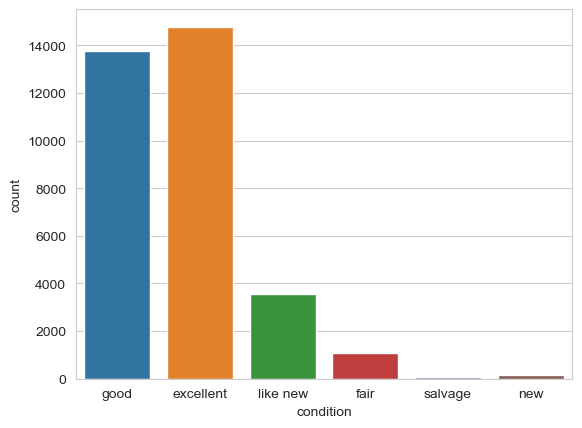

In [18]:
# Condition
# df = df[df['condition'] != 'missing']
# df = df[df['condition'] != 'new']
# df = df[df['condition'] != 'salvage']
sns.countplot(x='condition', data=df)

<Axes: xlabel='cylinders', ylabel='count'>

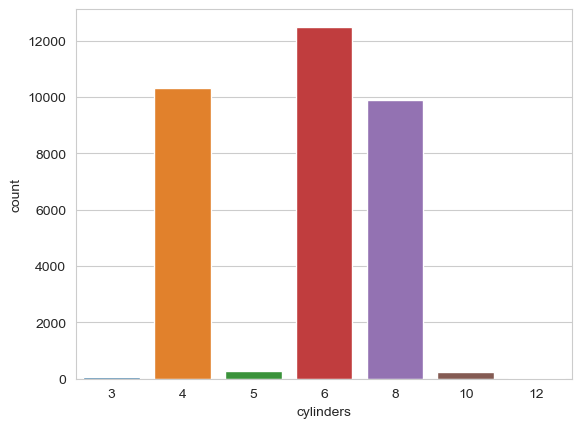

In [19]:
# Cylinders
df = df[df['cylinders'] != 'missing']
df = df[df['cylinders'] != 'other']

# Convert cylinders to integer
df['cylinders'] = df['cylinders'].str.split(' ', expand=True)[0].astype(int)

sns.countplot(x='cylinders', data=df)

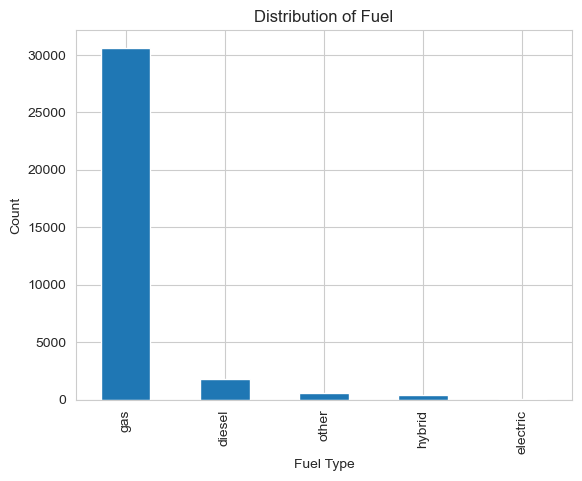

In [20]:
# Fuel
# df = df[df['fuel'] == 'gas']
df['fuel'].value_counts().plot(kind='bar')
plt.title('Distribution of Fuel')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

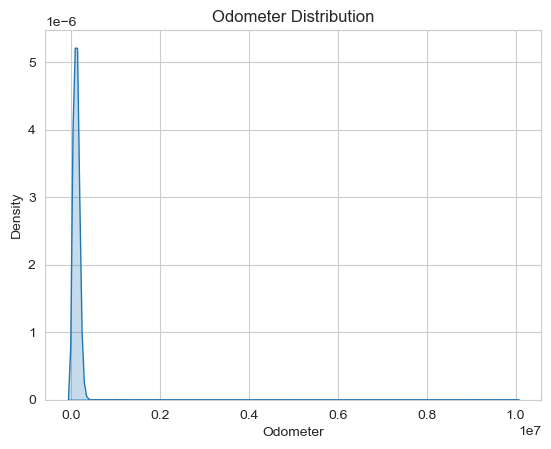

In [21]:
# Odometer
# Better to keep all values

from scipy import stats

# odometer_percentile = df['odometer'].quantile(0.995)
# df = df[df['odometer'] <= odometer_percentile]

# # Observe top odometers
# top_odometers = df['odometer'].sort_values(ascending=False).head(10)
# print(top_odometers)

# Odometer
sns.set_style('whitegrid')
sns.kdeplot(df[df['odometer'].notnull()]['odometer'], fill=True)
plt.title('Odometer Distribution')
plt.xlabel('Odometer')
plt.ylabel('Density')
plt.show()


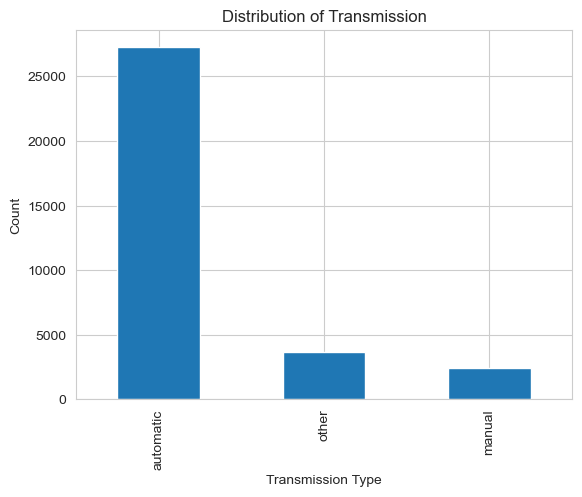

In [22]:
# Transmission
# df = df[df['transmission'] == 'automatic']
df['transmission'].value_counts().plot(kind='bar')
plt.title('Distribution of Transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

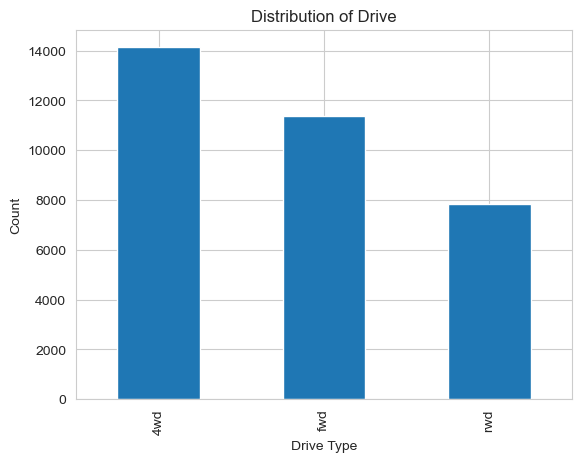

In [23]:
# Drive
df['drive'].value_counts().plot(kind='bar')
plt.title('Distribution of Drive')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()

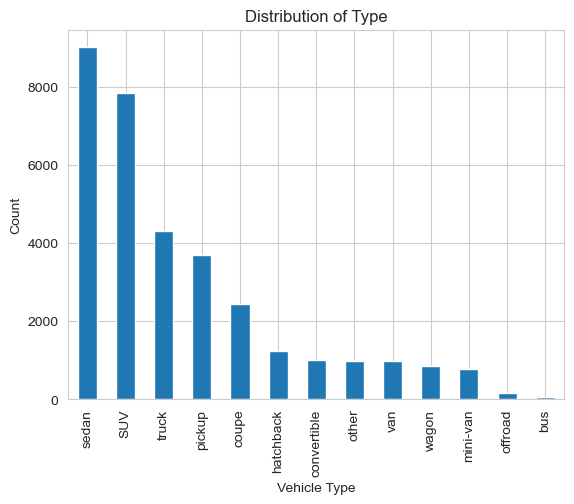

In [24]:
# Type

# df = df[df['type'] != 'missing']

# # Get the value counts for the 'type' column
# type_counts = df['type'].value_counts()

# # Get the types that appear less than 400 times
# low_count_types = type_counts[type_counts < 400].index

# # Keep only the rows where 'type' is not in the low_count_types list
# df = df[~df['type'].isin(low_count_types)]

df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

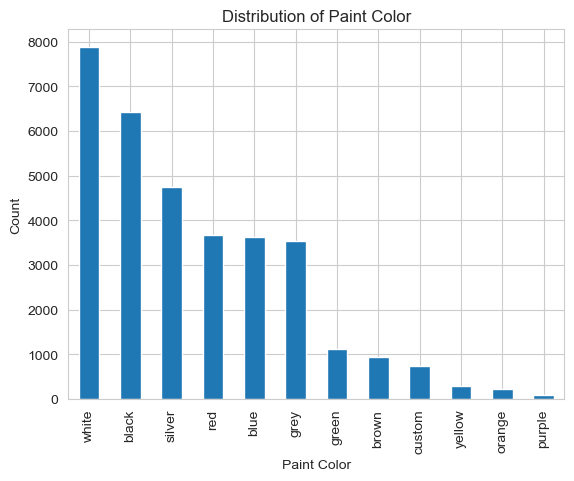

In [25]:
# Paint Color
# Get the count of each paint color
# paint_color_counts = df['paint_color'].value_counts()

# # Get a list of paint colors with count below 500
# other_paint_colors = paint_color_counts[paint_color_counts < 500].index.tolist()

# # Replace those paint colors with 'Other'
# df['paint_color'] = df['paint_color'].replace(other_paint_colors, 'Other')

df['paint_color'].value_counts().plot(kind='bar')
plt.title('Distribution of Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.show()

# Model Training

## Basic Imports

In [26]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Copy Train Data

In [27]:
import copy
df_train = copy.deepcopy(df)

cols=np.array(df.columns[df.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        
df_train.drop(columns=cols, inplace=True)

## Label Encoding + Transform

In [28]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# dict label encoder
cols=np.array(df.columns[df.dtypes != object])
d = defaultdict(LabelEncoder)

# fit_transform on categorical columns
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = df[cols]


## Heat Map

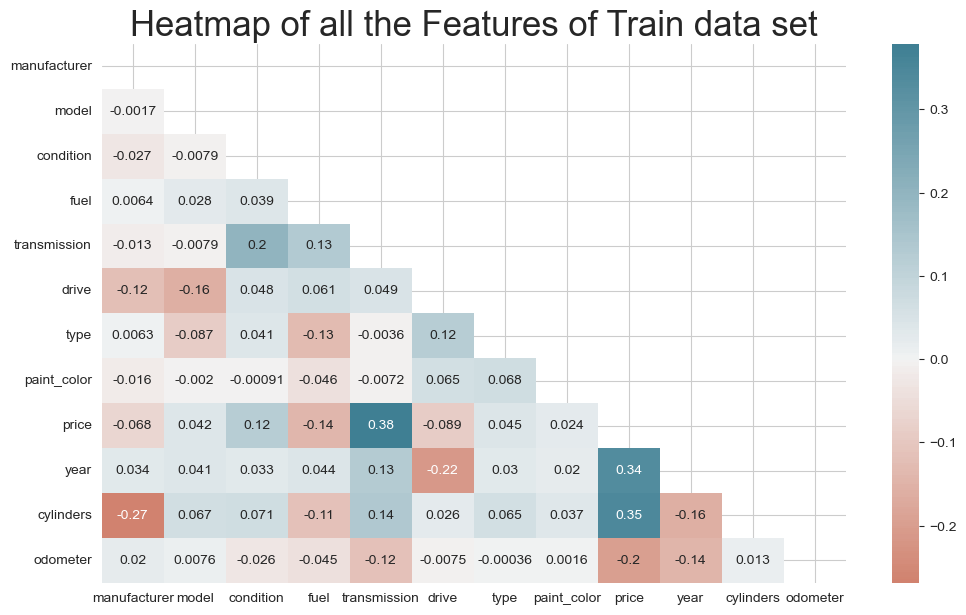

In [29]:
# Heat map
import matplotlib.style as style

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))

# Generate mask for upper triangle (from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);


# Define Reusable Functions

In [30]:
# Taken from HUYNH DONG NGUYEN on https://www.kaggle.com/code/winternguyen/used-car-price-estimation-96-accuracy

import copy
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


def defineData():
    # define dataset
    data = copy.deepcopy(df_train)
    X = data.drop(columns=['price']).values
    y0 = data['price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

def Models(models):
    
    model = models
    X, y = defineData()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Accuracy on Training set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

## Train Regressors

In [31]:
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

Accuracy = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Training set','Accuracy on Testing set'])

X, y = defineData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for x in tqdm(regressors):
    name = x[0]
    model = x[1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Accuracy = Accuracy.append(pd.Series({'model':name, 
                                'Root Mean Squared  Error': RMSE,
                                'Accuracy on Training set':ATrS,
                                'Accuracy on Testing set':ATeS}), ignore_index=True )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:11<00:00,  1.96s/it]


# Model Evaluation

## Accuracy Scores

In [32]:
Accuracy.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Training set,Accuracy on Testing set
3,MLPRegressor,1026.384528,-0.350854,-0.487344
4,AdaBoostRegressor,576.051589,0.528494,0.531495
0,DecisionTreeRegressor,433.396427,0.999663,0.734807
2,RandomForestRegressor,312.775901,0.980376,0.861880
1,XGBRegressor,308.372886,0.925153,0.865741
5,ExtraTreesRegressor,307.645523,0.999663,0.866374


## Regression Graphs

### Random Forest

		Error Table
Mean Absolute Error      :  184.73011736174655
Mean Squared  Error      :  90241.96401564407
Root Mean Squared  Error :  300.40300267414784
Accuracy on Training set   :  0.9819286917570291
Accuracy on Testing set  :  0.8725911176540384


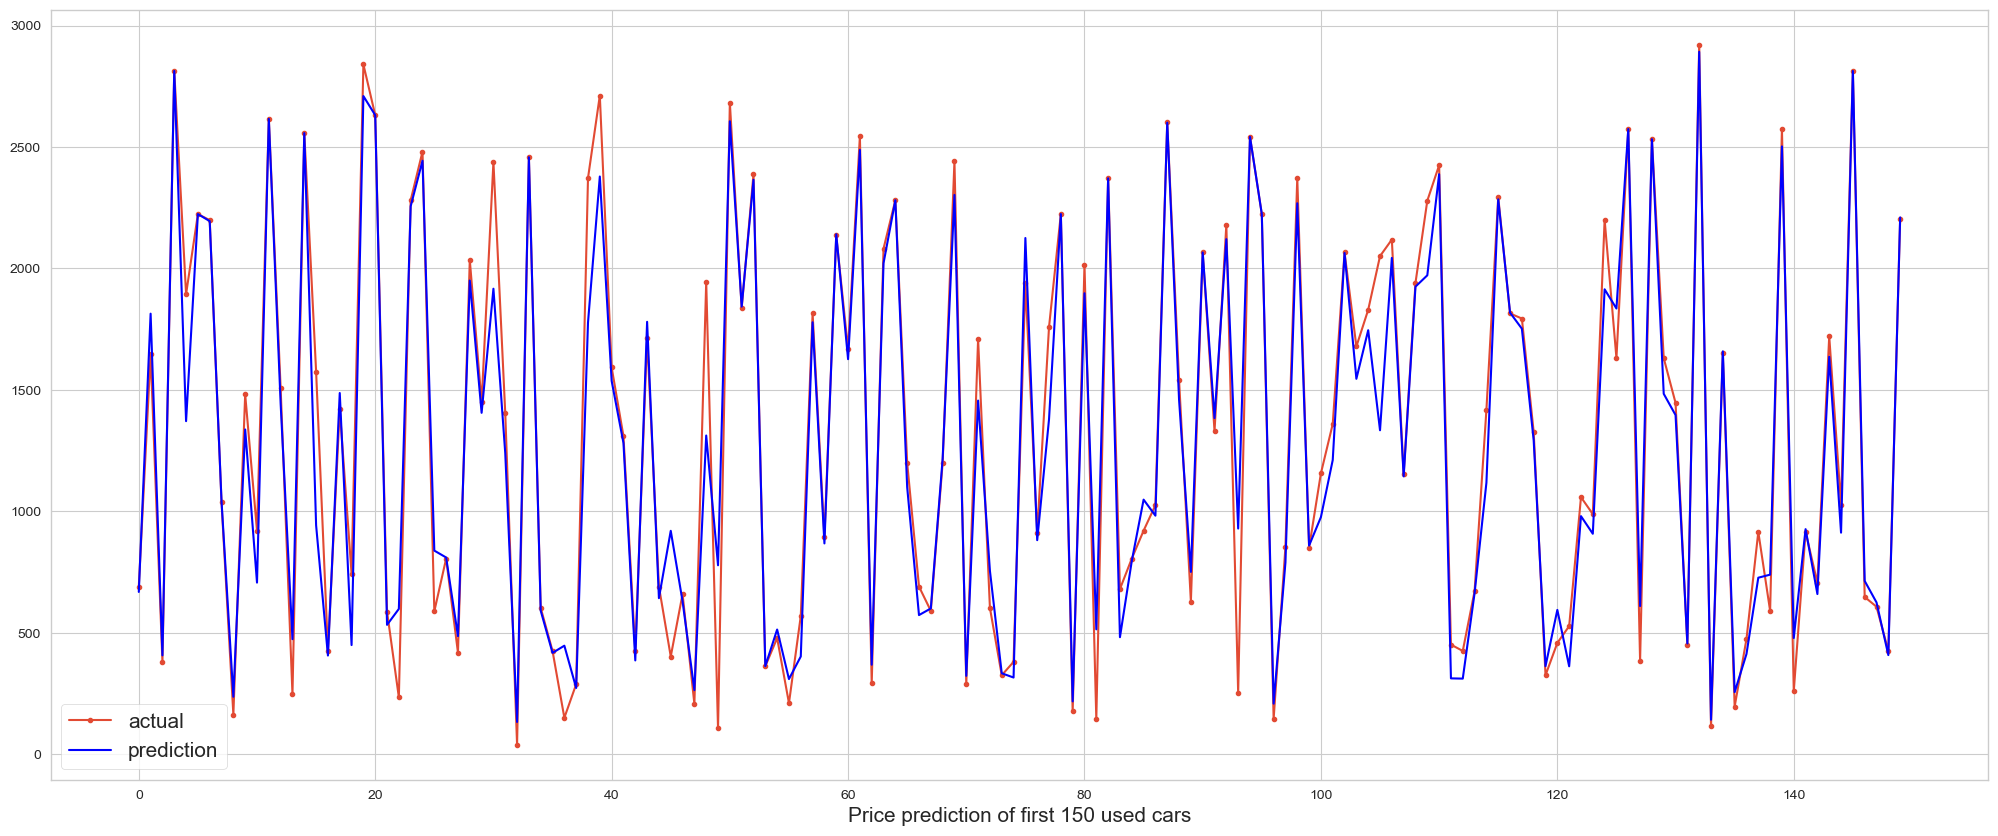

In [33]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

### Gradient Booster

		Error Table
Mean Absolute Error      :  195.06691339988987
Mean Squared  Error      :  91801.21356096842
Root Mean Squared  Error :  302.9871508182623
Accuracy on Training set   :  0.928966776198896
Accuracy on Testing set  :  0.8703896779576042


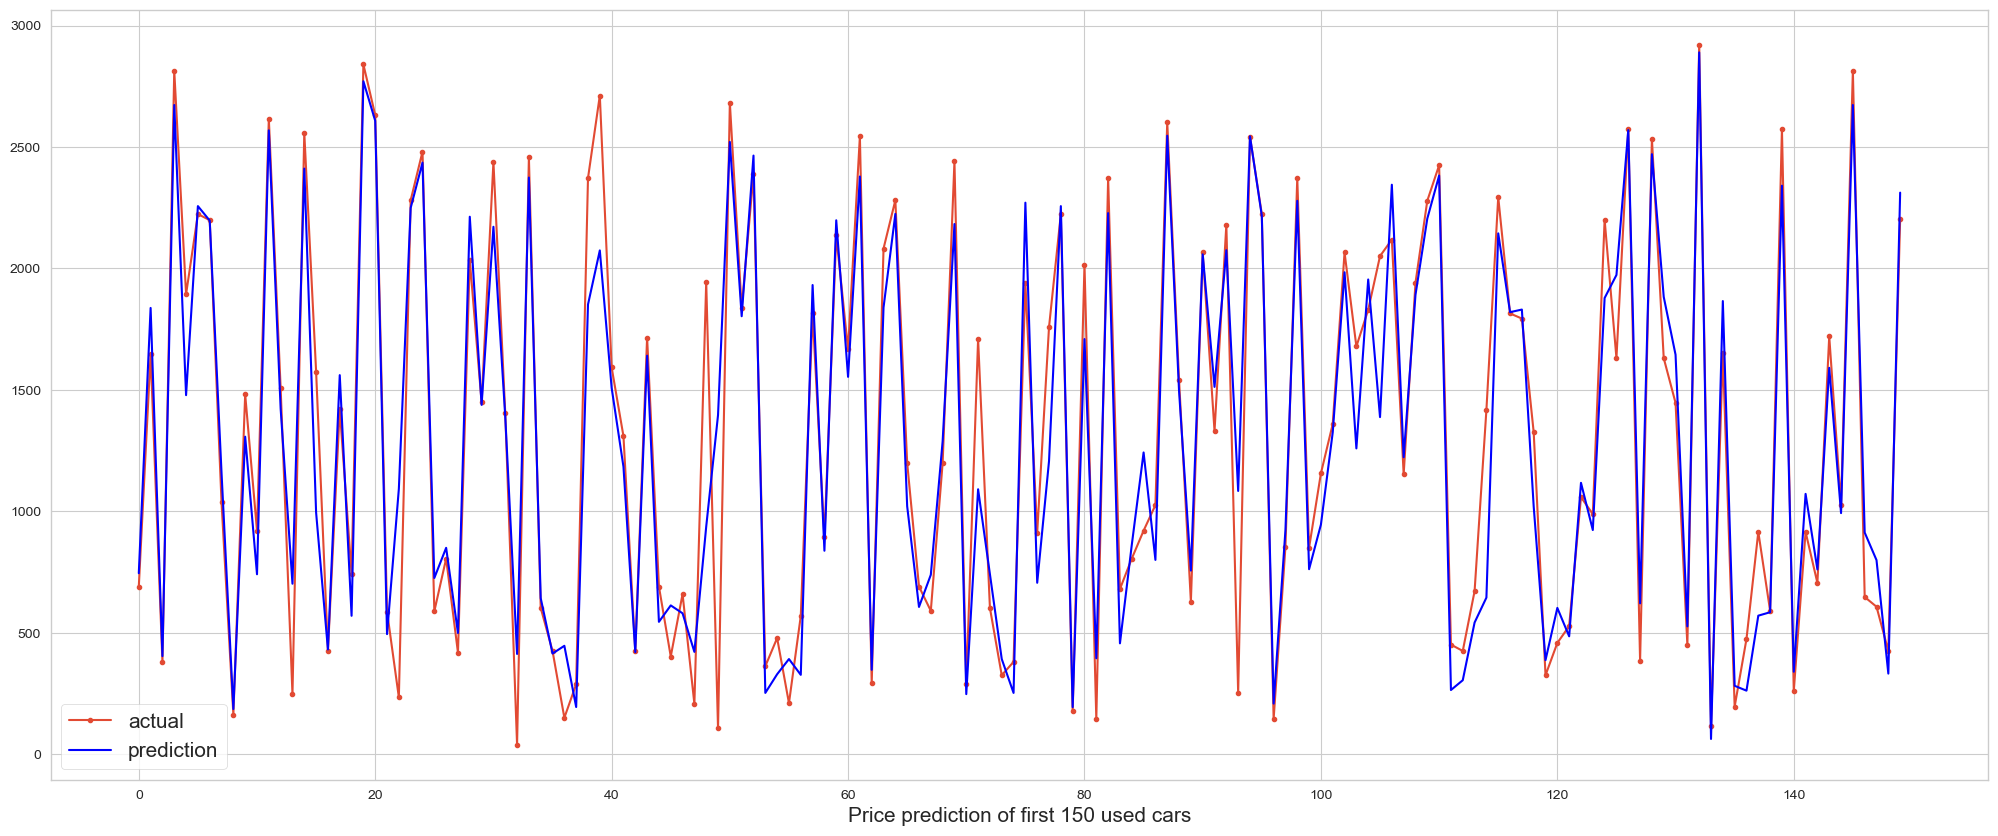

In [34]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)